In [1]:
############################################ Task 1)b)  #################################################

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
# Loading the data
df = pd.read_csv('student_data.csv')

In [4]:
####################### Creating a visualization of the data ####################################

C:\Users\14104\AppData\Local\Temp\ipykernel_12368\1224473867.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Review_Session', y='Hours_Studied', data=df, ci=None)
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


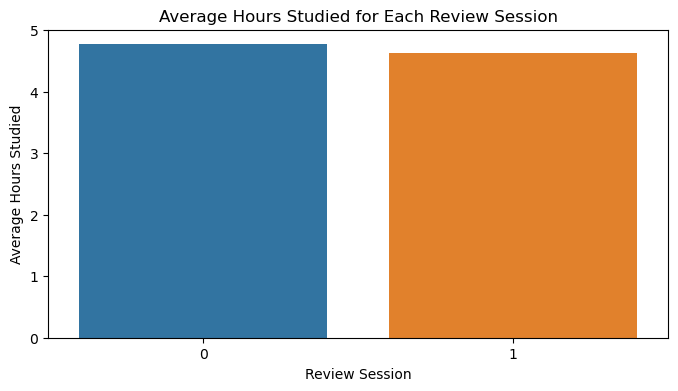

In [5]:
# Bar plot of average hours_studied for each review_session
plt.figure(figsize=(8, 4))
sns.barplot(x='Review_Session', y='Hours_Studied', data=df, ci=None)
plt.title('Average Hours Studied for Each Review Session')
plt.ylabel('Average Hours Studied')
plt.xlabel('Review Session')
plt.show()

C:\Users\14104\AppData\Local\Temp\ipykernel_12368\1864796784.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Results', y='Hours_Studied', data=df, ci=None)
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


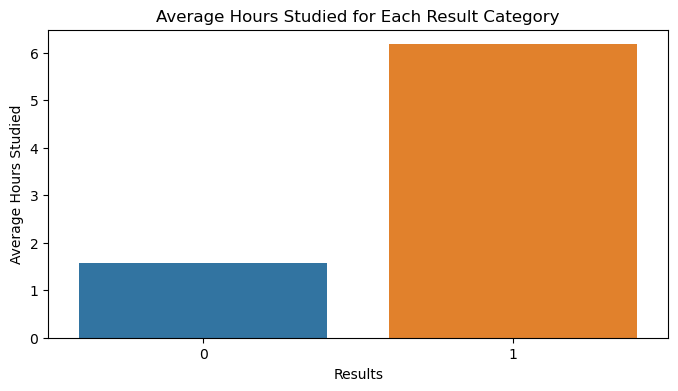

In [6]:
# Bar plot of average hours_studied for each result
plt.figure(figsize=(8, 4))
sns.barplot(x='Results', y='Hours_Studied', data=df, ci=None)
plt.title('Average Hours Studied for Each Result Category')
plt.ylabel('Average Hours Studied')
plt.xlabel('Results')
plt.show()

C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14104\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


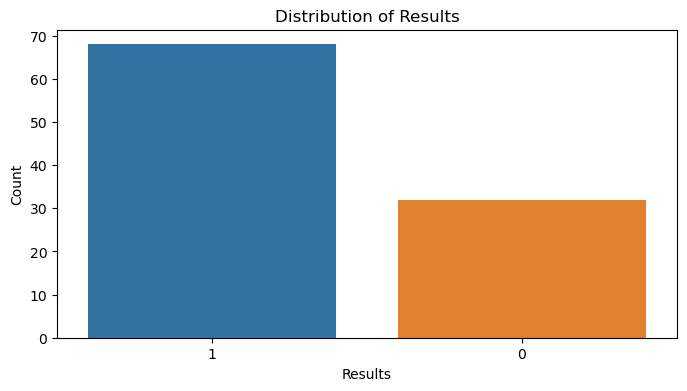

In [7]:
# Count plot of results
plt.figure(figsize=(8, 4))
sns.countplot(x='Results', data=df, order=df['Results'].value_counts().index)
plt.title('Distribution of Results')
plt.ylabel('Count')
plt.xlabel('Results')
plt.show()

In [8]:
############################# Fitting a model using logistic regression ##################################

In [9]:
# Separating features and target variable

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
# Training a logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(max_iter=1000)

In [11]:
# Predicting on the same dataset

y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:,1]  # Probabilities for the positive class

In [12]:
####### Output model coefficients and performance metrics such as accuracy and AUC and ROC ##########

In [13]:
# Finding coefficients

print("Coefficients:")
for feature, coef in zip(X, clf.coef_[0]):
    print(f"{feature}: {coef}")

Coefficients:
[3.74540119 0.        ]: 1.3649921479181382
[9.50714306 1.        ]: 1.8773375560380903


In [14]:
# Performance metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_proba)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")


Accuracy: 93.00%
AUC: 0.98


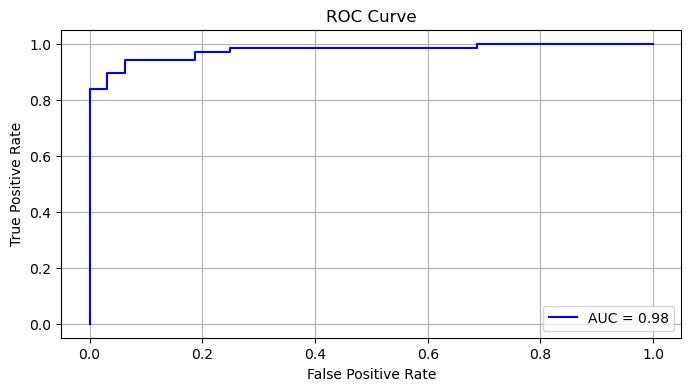

In [15]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [16]:
################################# Task 2 #######################################

In [17]:
# SVM with linear kernel

from sklearn.svm import SVC

# SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
print("Linear SVM trained!")

Linear SVM trained!


In [18]:
# SVM with RBF kernel & GridSearchCV for tuning gamma parameter

from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [0.1, 0.01, 0.001, 0.0001]}  
svm_rbf = SVC(kernel='rbf')
grid = GridSearchCV(svm_rbf, param_grid, cv=5)  # 5-fold cross-validation
grid.fit(X, y)

print(f"Best gamma for RBF SVM: {grid.best_params_['gamma']}")
print("RBF SVM with best gamma trained!")

Best gamma for RBF SVM: 0.1
RBF SVM with best gamma trained!
